# Waternet Example

- Code: https://github.com/tnwei/waternet
- Original paper: https://arxiv.org/abs/1901.05495

## Init network

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Make sure you are connected to a GPU instance
torch.cuda.is_available()

True

In [ ]:
# @title
# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.eval();

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/tnwei/waternet/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://www.dropbox.com/s/j8ida1d86hy5tm4/waternet_exported_state_dict-daa0ee.pt?dl=1" to /root/.cache/torch/hub/checkpoints/waternet_exported_state_dict-daa0ee.pt


## Image example

Source: NotBurtsBees - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=115615060

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/e/ea/ScubaDiver.jpg

--2024-01-05 09:08:01--  https://upload.wikimedia.org/wikipedia/commons/e/ea/ScubaDiver.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462987 (452K) [image/jpeg]
Saving to: ‘ScubaDiver.jpg’

ScubaDiver.jpg      100%[===================>] 452.14K  2.78MB/s    in 0.2s    

2024-01-05 09:08:02 (2.78 MB/s) - ‘ScubaDiver.jpg’ saved [462987/462987]



In [ ]:
# Load one image using OpenCV
im = cv2.imread("/content/T_S04857.png")
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [ ]:
# Resize image
rgb_im = cv2.resize(rgb_im, (720, 480))

In [ ]:
# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)

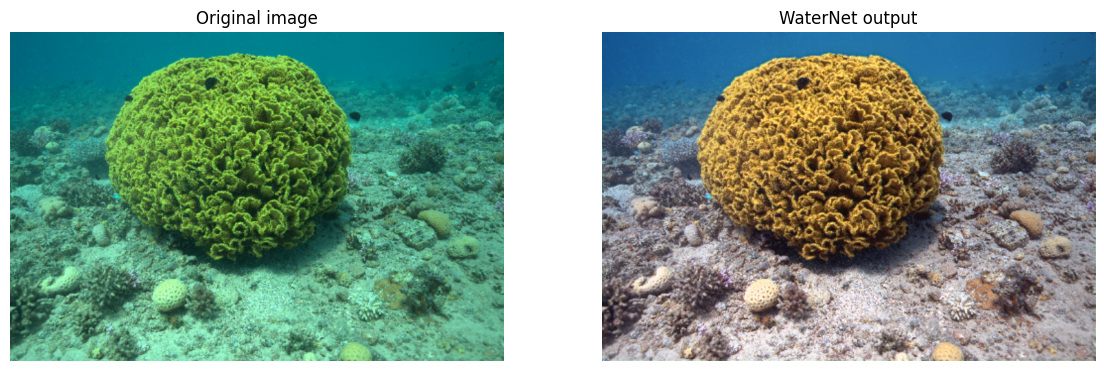

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im[0])
ax[1].axis("off")
ax[1].set_title("WaterNet output")

plt.show()

In [ ]:
import os
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.eval();

# Specify the path to your dataset folder
dataset_folder = '/content/drive/MyDrive/D3/'

# Create a folder to save the output images
output_folder = '/content/drive/MyDrive/Result_of_Image_Enhancement/'
os.makedirs(output_folder, exist_ok=True)

# Get a list of all image files in the dataset folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Loop over each image in the dataset
for image_file in image_files:
    # Load image using OpenCV
    image_path = os.path.join(dataset_folder, image_file)
    im = cv2.imread(image_path)
    rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    rgb_im = cv2.resize(rgb_im, (720, 480))

    # Inference
    rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
    out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
    out_im = postprocess(out_ten)

    # Save the output image
    output_path = os.path.join(output_folder, f"output_{image_file}")
    cv2.imwrite(output_path, cv2.cvtColor(out_im[0], cv2.COLOR_RGB2BGR))

# Print a message when processing is complete
print("Processing complete. Output images saved in:", output_folder)


/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/tnwei/waternet/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://www.dropbox.com/s/j8ida1d86hy5tm4/waternet_exported_state_dict-daa0ee.pt?dl=1" to /root/.cache/torch/hub/checkpoints/waternet_exported_state_dict-daa0ee.pt


Processing complete. Output images saved in: /content/drive/MyDrive/Result_of_Image_Enhancement/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
